<a href="https://colab.research.google.com/github/xiaorui777/NLP/blob/master/assignment_about_beijing_subway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignments for Week-03

## 1. Re-code the titanic machine learning

Ans：https://github.com/xiaorui777/NLP/tree/master/NLP-titanic

### 1. Random Choose Method to get optimal k and b
Ans：见versoin1.py

### 2.Supervised Direction to get optimal k and b
Ans：见version2.py

### 3.Gradient Descent to get optimal k and b
Ans：见version3.py

## 2. Answer following questions:

### 1. Why we need machine learning methods instead of creating a complicated formula?
Ans:  
- 因为现实世界的问题太过于复杂，人们有时候很难去找到其中的规律并通过一个公式抽象出来。

- 而且对于抽象一个复杂的公式，人们很难去找到最好的最适合的参数，所以我们需要机器学习，让机器自己去拟合那些复杂的参数。

### 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans:

版本1
- 随机生成 k，b ，将最小值保留下来
  缺点：速度较慢
- 结果：loop = 3983（共10000次）
       loss = 61.144827

### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Ans:

版本2
- 给 k，b 一个变化方向，假设下一步模型效果更好了，那么就让k，b继续沿着该方向变化，否则则沿相反方向变化
- 比版本1优化：提供了一个变化方向，提高了效率
- 缺点：如果一开始的方向不是最好的方向，很容易陷入局部最小值
- 结果：loop = 9368（共10000次）—— 很快达到 Version1 的收敛
       loss = 61.144827

       loop = 108
       loss = 46.729902

### 4. Why do we use Derivative / Gredient to fit a target function?
Ans: 
- 我们的目标是使 loss 最小，通过 梯度下降/导数 我们可以根据 loss 的变化不断找到一组最好的k，b的值。

### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:
- 梯度即函数在某一点最大的方向导数，函数沿梯度方向函数有最大的变化率。
- 直观地看，在x轴上某一点处，如果f’(x)>0，说明f(x)的函数值在x点沿x轴正方向是趋于增加的；如果f’(x)<0，说明f(x)的函数值在x点沿x轴正方向是趋于减少的。
- 下降即我们要找最小值，所以是往负方向找，直到找到最小值。

### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:

版本3
- 梯度下降，使k，b沿着导数的反方向下降，直到loss为最小值
- 根据 loss 对 k，b 进行修改，可以找到全局最优点，效率也较高
- 结果： loop = 1
        loss = 63.9425615 (参数更多的时候这个版本更好用)

### 7. Using the simple words to describe: What's the machine leanring.
Ans:

- 机器学习是一种数据分析技术，让计算机执行人和动物与生俱来的活动：从经验中学习。
- 机器学习算法使用计算方法直接从数据中“学习”信息，而不依赖于预定方程模型。
- 当可用于学习的样本数量增加时，这些算法可自适应提高性能。

## 3. Finish the search problem


  Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

### Dataflow:

**1. Get data from web page.**
- a. Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

- b. You may need @package requests page to get the response via url

- c. You may need save the page source to file system.

- d. The target of this step is get station information of all the subway lines;

- e. You may need install @package beautiful soup to get the url information, or just use > Regular Expression to get the url. Our recommendation is that using the Regular Expression and BeautiflSoup both.

- f. You may need BFS to get all the related page url from one url. Question: Why do we use BFS to traverse web page (or someone said, build a web spider)? Can DFS do this job? which is better?

In [0]:
import re
import requests
from bs4 import BeautifulSoup

In [0]:
# 法一：beautifulsoup
import sys
from urllib.request import urlopen

html = urlopen('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485')
soup = BeautifulSoup(html.read())

In [3]:
soup.find_all('a',target="_blank",text=re.compile(r'北京地铁\w+线'))

[<a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁1号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF" target="_blank">北京地铁八通线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁5号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁8号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁10号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF" target="_blank">北京地铁机场线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%

In [0]:
# 法二：正则式
import urllib
root_url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

#获取完整超链接
def getUrl(url):
    response = urllib.request.urlopen(url)
    content = response.read().decode('utf-8')
    reg = re.compile(r"href=\"/item/.*?\">北京地铁\w+线")
    urls = re.findall(reg, content)
    for u in urls:
        print(u)

In [5]:
all_url = getUrl(root_url)

href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF">北京地铁1号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF">北京地铁1号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF">北京地铁13号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF">北京地铁13号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF">北京地铁八通线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF">北京地铁5号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF">北京地铁8号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF">北京地铁10号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF">北京地铁机场线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF">北京地铁4号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF">北京地铁15号线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF">北京地铁昌平线
href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%9

**2. Preprocessing data from page source.**

- a. Based on the page source gotten from url. You may need some more preprocessing of the page.

- b. the Regular Expression you may need to process the text information.

- c. You may need @package networkx, @package matplotlib to visualize data.

- d. You should build a dictionary or graph which could represent the connection information of Beijing subway routes.

- e. You may need the defaultdict, set data structures to implement this procedure.

In [0]:
# 经观察 新的url的形式为 https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF

def getNewUrl(url):
    newurls = []
    urls = urlopen(url)
    soup = BeautifulSoup(urls.read())
    
    divs = soup.find_all(class_ = 'main-content')
    table = divs[0].find_all('table')

    trs = table[2].find_all('tr')
    for tr in trs[1:-1]:
        a = tr.find_all('a')
        if not a:
            continue
        if not a[0].attrs['href']:
            continue
        url = "https://baike.baidu.com" + str(a[0].attrs['href'])

        if url not in newurls:
            newurls.append(url)

    return  newurls

In [0]:
all_urls = getNewUrl(root_url)

In [8]:
all_urls

['https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
 'https://b

In [9]:
len(all_urls)

19

In [10]:
# 检查正则
string = '北京地铁1号线车站列表'
table_name = re.findall('北京地铁(.*?)车站列表',string)
print(table_name)

['1号线']


In [0]:
from collections import defaultdict

In [0]:
subway_station = defaultdict(list)

In [0]:
def get_single_route_station(url):
    station_url = urlopen(url)
    soup = BeautifulSoup(station_url.read())
    tables = soup.find_all('table')

    for table in tables:
        if not table.caption: continue
        caption = table.caption.string

        route_name = re.findall('^北京地铁(.*?)车站列表|^北京地铁(.*?)车站信息$',str(caption))
        if route_name:
            trs = table.find_all('tr')
            for tr in trs[1:]:
                tds = tr.find_all('td')
                for td in tds[:2]:
                    if not td.a: continue
                    if td.a.string[-1] == '站':
                        subway_station[route_name[0]].append(td.a.string)
        print(subway_station[route_name[0]])

In [14]:
# 用北京地铁一号线测试是否取出了站名
test_url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF'
get_single_route_station(test_url)

['黑石头站', '高井站', '福寿岭站', '苹果园站', '古城站', '衙门口站', '八角游乐园站', '八宝山站', '玉泉路站', '五棵松站', '万寿路站', '公主坟站', '军事博物馆站', '木樨地站', '南礼士路站', '复兴门站', '西单站', '天安门西站', '天安门东站', '王府井站', '东单站', '建国门站', '永安里站', '国贸站', '大望路站', '四惠站', '四惠东站', '高碑店站', '传媒大学站', '双桥站', '管庄站', '八里桥站', '通州北苑站', '果园站', '九棵树站', '梨园站', '临河里站', '土桥站', '花庄站', '环球度假区站']


In [0]:
subway_station_distance = defaultdict(dict)

In [16]:
subway_station_distance

defaultdict(dict, {})

In [0]:
# 查找相邻站间距信息统计表
def get_route_station_distance(url):
    station_url = urlopen(url)
    soup = BeautifulSoup(station_url.read())
    tables = soup.find_all('table')
    
    for table in tables:
        if not table.caption: continue
        caption = table.caption.string

        route_name = re.findall('(.*?)相邻站间距信息统计表$',str(caption))
        if not route_name: continue
        trs = table.find_all('tr')
        temp = dict()
        
        for tr in trs[1:]:
            if not tr.th.string: s = tr.th.div.string
            else: s = tr.th.string
            stations = s.strip().split('——')
            distance = int(re.findall('(\d+)',tr.td.string)[0])
            temp[tuple(stations)] = distance
        
        subway_station_distance[route_name[0]] = temp
        # print(subway_station_distance)

In [0]:
test_url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%B4%E7%BA%BF/7792898'
get_route_station_distance(test_url)

In [0]:
def get_all_stations_distance(urls):
    for url in urls:
        get_route_station_distance(url)
    pass

In [0]:
get_all_stations_distance(all_urls)

In [0]:
subway_keys = subway_station_distance.keys()

In [22]:
subway_keys

dict_keys(['大兴线', '2号线', '4号线', '5号线', '6号线', '7号线', '北京地铁8号线', '10号线', '14号线（西段）', '14号线（东段）', '15号线', '八通线', '昌平线', '房山线'])

In [23]:
subway_station_distance

defaultdict(dict,
            {'10号线': {('三元桥', '亮马桥'): 1506,
              ('丰台站', '泥洼'): 954,
              ('亮马桥', '农业展览馆'): 914,
              ('健德门', '北土城'): 1,
              ('公主坟', '西钓鱼台'): 2386,
              ('六里桥', '莲花桥'): 2392,
              ('农业展览馆', '团结湖'): 853,
              ('分钟寺', '成寿寺'): 1058,
              ('劲松', '潘家园'): 1021,
              ('北土城', '安贞门'): 1020,
              ('十里河', '分钟寺'): 1804,
              ('双井', '劲松'): 1006,
              ('呼家楼', '金台夕照'): 734,
              ('团结湖', '呼家楼'): 1149,
              ('国贸', '双井'): 1759,
              ('大红门', '角门东'): 1130,
              ('太阳宫', '三元桥'): 1759,
              ('安贞门', '惠新西街南口'): 982,
              ('宋家庄', '石榴庄'): 1269,
              ('巴沟', '苏州街'): 1110,
              ('惠新西街南口', '芍药居'): 1712,
              ('慈寿寺', '车道沟'): 1590,
              ('成寿寺', '宋家庄'): 1677,
              ('泥洼', '西局'): 749,
              ('海淀黄庄', '知春里'): 975,
              ('潘家园', '十里河'): 1097,
              ('火器营', '巴沟'): 1495,
         

In [0]:
# 删除无效键值
for key in list(subway_station_distance.keys()):
        if not subway_station_distance.get(key):
            del subway_station_distance[key]

In [25]:
subway_station_distance

defaultdict(dict,
            {'10号线': {('三元桥', '亮马桥'): 1506,
              ('丰台站', '泥洼'): 954,
              ('亮马桥', '农业展览馆'): 914,
              ('健德门', '北土城'): 1,
              ('公主坟', '西钓鱼台'): 2386,
              ('六里桥', '莲花桥'): 2392,
              ('农业展览馆', '团结湖'): 853,
              ('分钟寺', '成寿寺'): 1058,
              ('劲松', '潘家园'): 1021,
              ('北土城', '安贞门'): 1020,
              ('十里河', '分钟寺'): 1804,
              ('双井', '劲松'): 1006,
              ('呼家楼', '金台夕照'): 734,
              ('团结湖', '呼家楼'): 1149,
              ('国贸', '双井'): 1759,
              ('大红门', '角门东'): 1130,
              ('太阳宫', '三元桥'): 1759,
              ('安贞门', '惠新西街南口'): 982,
              ('宋家庄', '石榴庄'): 1269,
              ('巴沟', '苏州街'): 1110,
              ('惠新西街南口', '芍药居'): 1712,
              ('慈寿寺', '车道沟'): 1590,
              ('成寿寺', '宋家庄'): 1677,
              ('泥洼', '西局'): 749,
              ('海淀黄庄', '知春里'): 975,
              ('潘家园', '十里河'): 1097,
              ('火器营', '巴沟'): 1495,
         

In [0]:
# 把线路名取出
route_name = subway_station_distance.keys()

In [27]:
route_name

dict_keys(['大兴线', '2号线', '4号线', '5号线', '6号线', '7号线', '北京地铁8号线', '10号线', '14号线（西段）', '14号线（东段）', '15号线', '八通线', '昌平线', '房山线'])

In [0]:
# 把车站名和距离取出
station_name = []
station_distance = []
for key,values in subway_station_distance.items():
    station_dic = values
    for station,distance in station_dic.items():
        station_name.append(station)
        station_distance.append(distance)

In [29]:
station_name

[('公益西桥', '新宫'),
 ('新宫', '西红门'),
 ('西红门', '高米店北'),
 ('高米店北', '高米店南'),
 ('高米店南', '枣园'),
 ('枣园', '清源路'),
 ('清源路', '黄村西大街'),
 ('黄村西大街', '黄村火车站'),
 ('黄村火车站', '义和庄'),
 ('义和庄', '生物医药基地'),
 ('生物医药基地', '天宫院'),
 ('西直门', '车公庄'),
 ('车公庄', '阜成门'),
 ('阜成门', '复兴门'),
 ('复兴门', '长椿街'),
 ('长椿街', '宣武门'),
 ('宣武门', '和平门'),
 ('和平门', '前门'),
 ('前门', '崇文门'),
 ('崇文门', '北京站'),
 ('北京站', '建国门'),
 ('建国门', '朝阳门'),
 ('朝阳门', '东四十条'),
 ('东四十条', '东直门'),
 ('东直门', '雍和宫'),
 ('雍和宫', '安定门'),
 ('安定门', '鼓楼大街'),
 ('鼓楼大街', '积水潭'),
 ('积水潭', '西直门'),
 ('安河桥北', '北宫门'),
 ('北宫门', '西苑'),
 ('西苑', '圆明园'),
 ('圆明园', '北京大学东门'),
 ('北京大学东门', '中关村'),
 ('中关村', '海淀黄庄'),
 ('海淀黄庄', '人民大学'),
 ('人民大学', '魏公村'),
 ('魏公村', '国家图书馆'),
 ('国家图书馆', '动物园'),
 ('动物园', '西直门'),
 ('西直门', '新街口'),
 ('新街口', '平安里'),
 ('平安里', '西四'),
 ('西四', '灵境胡同'),
 ('灵境胡同', '西单'),
 ('西单', '宣武门'),
 ('宣武门', '菜市口'),
 ('菜市口', '陶然亭'),
 ('陶然亭', '北京南站'),
 ('北京南站', '马家堡'),
 ('马家堡', '角门西'),
 ('角门西', '公益西桥'),
 ('天通苑北', '天通苑'),
 ('天通苑', '天通苑南'),
 ('天通苑南', '立水桥'),
 ('立水桥', '立水桥南'),
 ('立水桥南', '北苑

In [30]:
type(station_name)

list

In [31]:
type(station_distance)

list

In [32]:
station_distance

[2798,
 5102,
 1810,
 1128,
 1096,
 1189,
 1214,
 987,
 2035,
 2918,
 1811,
 909,
 960,
 1832,
 1234,
 929,
 851,
 1171,
 1634,
 1023,
 945,
 1763,
 1027,
 824,
 2228,
 794,
 1237,
 1766,
 1899,
 1363,
 1251,
 1672,
 1295,
 887,
 900,
 1063,
 1051,
 1658,
 1517,
 1441,
 1025,
 1100,
 1100,
 869,
 1011,
 815,
 1152,
 1200,
 1643,
 1480,
 827,
 989,
 939,
 965,
 1544,
 1305,
 1286,
 3,
 1838,
 1122,
 1025,
 1059,
 1151,
 866,
 791,
 1016,
 848,
 945,
 821,
 876,
 1183,
 1,
 905,
 1670,
 1508,
 1431,
 1166,
 1664,
 887,
 1443,
 1321,
 1349,
 1937,
 1399,
 1668,
 845,
 1450,
 2036,
 1282,
 3999,
 1238,
 1854,
 1405,
 2115,
 2557,
 1468,
 1543,
 1599,
 929,
 1346,
 1194,
 935,
 734,
 1874,
 1374,
 885,
 1205,
 869,
 1016,
 1138,
 1332,
 1241,
 1311,
 781,
 865,
 903,
 1464,
 906,
 1679,
 1304,
 1021,
 2318,
 1985,
 2056,
 1114,
 1894,
 1543,
 1041,
 2553,
 2555,
 1016,
 1667,
 900,
 1018,
 1274,
 1083,
 1188,
 902,
 1110,
 950,
 975,
 1058,
 1101,
 1330,
 973,
 1,
 1020,
 982,
 1712,
 1003,

In [33]:
# 单个站名
single_station = []
for route,stations in subway_station_distance.items():
    for i,j in stations.items():
        if i not in single_station:
            single_station.append(i[0])
print(single_station)
print(len(single_station))

['公益西桥', '新宫', '西红门', '高米店北', '高米店南', '枣园', '清源路', '黄村西大街', '黄村火车站', '义和庄', '生物医药基地', '西直门', '车公庄', '阜成门', '复兴门', '长椿街', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '雍和宫', '安定门', '鼓楼大街', '积水潭', '安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '天通苑北', '天通苑', '天通苑南', '立水桥', '立水桥南', '北苑路北', '大屯路东', '惠新西街北口', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫', '北新桥', '张自忠路', '东四', '灯市口', '东单', '崇文门', '磁器口', '天坛东门', '蒲黄榆', '刘家窑', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', 

In [0]:
geo_url = urlopen('https://blog.csdn.net/yanliang1/article/details/20897805')
soup = BeautifulSoup(geo_url.read())
geo = soup.find_all('div',id='content_views')

In [35]:
geo

[<div class="htmledit_views" id="content_views">
 <p>因工作需要收集的数据，希望对大家有帮助</p>
 <p>苹果园,39.9263251384,116.1777806282</p>
 古城,39.9072014648,116.1902475357<br/>
 八角游乐园,39.9074319023,116.2128210068<br/>
 八宝山,39.9072673042,116.2358236313<br/>
 玉泉路,39.9073331435,116.2530326843<br/>
 五棵松,39.9078269362,116.2740182877<br/>
 万寿路,39.9074319023,116.2951755524<br/>
 公主坟,39.9074319023,116.3097667694<br/>
 军事博物馆,39.9074648219,116.3240146637<br/>
 木樨地,39.9076294195,116.3374471664<br/>
 南礼士路,39.9072014648,116.3525962830<br/>
 复兴门,39.9071685451,116.3565444946<br/>
 西单,39.9074319023,116.3742685318<br/>
 天安门西,39.9074648219,116.3917350769<br/>
 天安门东,39.9077281779,116.4016485214<br/>
 王府井,39.9080244523,116.4115619659<br/>
 东单,39.9081890486,116.4179134369<br/>
 建国门,39.9085182400,116.4358091354<br/>
 永安里,39.9083865636,116.4504861832<br/>
 国贸,39.9091436994,116.4619016647<br/>
 大望路,39.9085182400,116.4770936966<br/>
 四惠,39.9087157541,116.4954614639<br/>
 四惠东,39.9085182400,116.5153312683<br/>
 北京站,39.9049628889,116

In [36]:
type(geo)

bs4.element.ResultSet

In [0]:
geo_text = []
for i in geo:
    geo_text.append(str(i))

In [38]:
geo_text

['<div class="htmledit_views" id="content_views">\n<p>因工作需要收集的数据，希望对大家有帮助</p>\n<p>苹果园,39.9263251384,116.1777806282</p>\n古城,39.9072014648,116.1902475357<br/>\n八角游乐园,39.9074319023,116.2128210068<br/>\n八宝山,39.9072673042,116.2358236313<br/>\n玉泉路,39.9073331435,116.2530326843<br/>\n五棵松,39.9078269362,116.2740182877<br/>\n万寿路,39.9074319023,116.2951755524<br/>\n公主坟,39.9074319023,116.3097667694<br/>\n军事博物馆,39.9074648219,116.3240146637<br/>\n木樨地,39.9076294195,116.3374471664<br/>\n南礼士路,39.9072014648,116.3525962830<br/>\n复兴门,39.9071685451,116.3565444946<br/>\n西单,39.9074319023,116.3742685318<br/>\n天安门西,39.9074648219,116.3917350769<br/>\n天安门东,39.9077281779,116.4016485214<br/>\n王府井,39.9080244523,116.4115619659<br/>\n东单,39.9081890486,116.4179134369<br/>\n建国门,39.9085182400,116.4358091354<br/>\n永安里,39.9083865636,116.4504861832<br/>\n国贸,39.9091436994,116.4619016647<br/>\n大望路,39.9085182400,116.4770936966<br/>\n四惠,39.9087157541,116.4954614639<br/>\n四惠东,39.9085182400,116.5153312683<br/>\n北京站,39.9049628889,11

In [0]:
geo_text_str = ''.join(geo_text)

In [0]:
station_geo = re.findall(r'\w+,\d+\.\d+,\d+\.\d+',geo_text_str)

In [41]:
station_geo

['苹果园,39.9263251384,116.1777806282',
 '古城,39.9072014648,116.1902475357',
 '八角游乐园,39.9074319023,116.2128210068',
 '八宝山,39.9072673042,116.2358236313',
 '玉泉路,39.9073331435,116.2530326843',
 '五棵松,39.9078269362,116.2740182877',
 '万寿路,39.9074319023,116.2951755524',
 '公主坟,39.9074319023,116.3097667694',
 '军事博物馆,39.9074648219,116.3240146637',
 '木樨地,39.9076294195,116.3374471664',
 '南礼士路,39.9072014648,116.3525962830',
 '复兴门,39.9071685451,116.3565444946',
 '西单,39.9074319023,116.3742685318',
 '天安门西,39.9074648219,116.3917350769',
 '天安门东,39.9077281779,116.4016485214',
 '王府井,39.9080244523,116.4115619659',
 '东单,39.9081890486,116.4179134369',
 '建国门,39.9085182400,116.4358091354',
 '永安里,39.9083865636,116.4504861832',
 '国贸,39.9091436994,116.4619016647',
 '大望路,39.9085182400,116.4770936966',
 '四惠,39.9087157541,116.4954614639',
 '四惠东,39.9085182400,116.5153312683',
 '北京站,39.9049628889,116.4272689819',
 '崇文门,39.9009793597,116.4168834686',
 '前门,39.8999587488,116.3979578018',
 '和平门,39.9000904414,116.3841819763',


In [0]:
name = []
geo_list = []
for i in station_geo:
    k = i.split(',')
    name.append(k[0])
    geo1 = float(k[1])
    geo2 = float(k[2])
    geo_list.append([geo1,geo2])

In [0]:
geo_dic = dict(zip(name, geo_list))

In [44]:
geo_dic

{'七里庄': [39.8675310111, 116.2942126393],
 '万寿路': [39.9074319023, 116.2951755524],
 '三元桥': [39.9613658535, 116.4568376541],
 '东单': [39.9081890486, 116.4179134369],
 '东四': [39.9243700208, 116.4174936712],
 '东四十条': [39.9338612292, 116.434006691],
 '东大桥': [39.9228797332, 116.4517012239],
 '东直门': [39.9411332638, 116.4336633682],
 '中关村': [39.9838449697, 116.3164830208],
 '丰台站': [39.8498560655, 116.305013895],
 '义和庄': [39.712501965, 116.3190150261],
 '五棵松': [39.9078269362, 116.2740182877],
 '亮马桥': [39.9490830824, 116.4619070292],
 '人民大学': [39.9674015726, 116.3213539124],
 '俸伯': [40.1325679642, 116.6849541664],
 '八宝山': [39.9072673042, 116.2358236313],
 '八角游乐园': [39.9074319023, 116.2128210068],
 '公主坟': [39.9074319023, 116.3097667694],
 '公益西桥': [39.8370219177, 116.3708353043],
 '六里桥': [39.8803337264, 116.3027608395],
 '军事博物馆': [39.9074648219, 116.3240146637],
 '农业展览馆': [39.9417090706, 116.4621269703],
 '分钟寺': [39.8518740541, 116.4539784193],
 '刘家窑': [39.8576455856, 116.422124505],
 '前门': [39.899

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
subway_graph = nx.Graph()

In [0]:
subway_graph.add_nodes_from(name)

In [0]:
edges = [(u,v,d) for (u,v,d) in subway_graph.edges(data=True)]

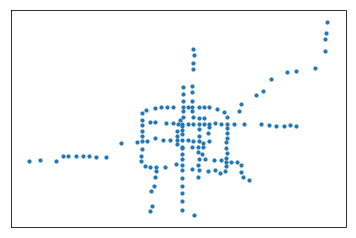

In [49]:
nx.draw_networkx_nodes(subway_graph,geo_dic,with_labels =True,node_size=10)

**3. Build the search agent**

- a. Build the search agent based on the graph we build.

- b. As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions.

Ans：

方法见https://github.com/xiaorui777/NLP/blob/master/Breadth_first_%20search.ipynb

**4. Create different policies for transfer system.**

- a. Define different policies for transfer system.

- b. Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

- c. Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the @param by_way stations.


e.g
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
     based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)

**5. Test your result with commercial applications.**
将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因